In [1]:
import tensorflow as tf
import timeit

In [2]:
cell = tf.keras.layers.LSTMCell(100)

In [3]:
@tf.function
def fn(input, state):
    return cell(input, state)

In [4]:
input = tf.zeros([100, 100])
state = [tf.zeros([100, 100])] * 2

In [5]:
# 워밍업
cell(input, state)
fn(input, state)

(<tf.Tensor: shape=(100, 100), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 [<tf.Tensor: shape=(100, 100), dtype=float32, numpy=
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
  <tf.Tensor: shape=(100, 100), dtype=float32, numpy=
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>])

In [6]:
graph_time = timeit.timeit(lambda: cell(input, state), number = 1000)
auto_graph_time = timeit.timeit(lambda: fn(input, state), number =1000)
print('grpah_time:', graph_time)
print('auto_graph_time:', auto_graph_time)

grpah_time: 0.32798164599807933
auto_graph_time: 0.1735839050015784


In [7]:
import pydot

In [8]:
#함수적 API
def build_model():
    text_input_a = tf.keras.Input(shape=(None,), dtype='int32')
    text_input_b = tf.keras.Input(shape=(None,), dtype='int32')
    
    shared_embedding = tf.keras.layers.Embedding(1000, 128)
    
    encoded_input_a = shared_embedding(text_input_a)
    encoded_input_b = shared_embedding(text_input_b)
    
    prediction_a = tf.keras.layers.Dense(1, activation='sigmoid', name='prediction_a')(encoded_input_a)
    prediction_b = tf.keras.layers.Dense(1, activation='sigmoid', name='prediction_b')(encoded_input_b)
    
    model = tf.keras.Model(inputs = [text_input_a, text_input_b], outputs = [prediction_a, prediction_b])
    
    tf.keras.utils.plot_model(model, to_file="shared_model.png")    

In [9]:
build_model()

In [14]:
# Model SubClassing

class MyLayer(tf.keras.layers.Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(MyLayer, self).__init__(**kwargs)
        
    def build(self, input_shape):
        # 이 계층의 훈련 간으한 가중치 변수 설정
        self.kernel = self.add_weight(name='kernel', shape=(input_shape[1], self.output_dim), initializer = 'uniform', trainable=True)
        
    def call(self, inputs):
        return tf.matmul(inputs, self.kernel)

In [15]:
model = tf.keras.Sequential([
    MyLayer(20),
    tf.keras.layers.Activation('softmax')
])

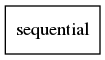

In [16]:
tf.keras.utils.plot_model(model, to_file="sub_classing_model.png")

In [17]:
#Callback
callboacks = [tf.keras.callbacks.TensorBoard(log_dir='../logs')]

In [ ]:
model.fit(data, labels, batch_size=256, epochs=100, callbacks=callbacks, validation_data=(val_data, val_labels))

In [18]:
import tensorflow_datasets as tfds

In [19]:
builders = tfds.list_builders()
print(builders)

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'ai2_arc', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_rc', 'esnli', 'eurosat', 'fashion_mnist', 'flic', 'flores', 'food101', 'forest_fires', 'fuss', 'gap',

In [21]:
data, info = tfds.load("mnist", with_info = True)
train_data, test_data =data['train'], data['test']

print(info)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.

Dl Completed...: 100%|██████████| 4/4 [00:00<00:00,  4.49 file/s]


Dataset mnist downloaded and prepared to /home/methodfunc/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [28]:
data = tfds.load('cats_vs_dogs', with_info = True)

In [32]:
data['train']

TypeError: tuple indices must be integers or slices, not str

In [30]:
data

({'train': <PrefetchDataset shapes: {image: (None, None, 3), image/filename: (), label: ()}, types: {image: tf.uint8, image/filename: tf.string, label: tf.int64}>},
 tfds.core.DatasetInfo(
     name='cats_vs_dogs',
     version=4.0.0,
     description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
     homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
     features=FeaturesDict({
         'image': Image(shape=(None, None, 3), dtype=tf.uint8),
         'image/filename': Text(shape=(), dtype=tf.string),
         'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
     }),
     total_num_examples=23262,
     splits={
         'train': 23262,
     },
     supervised_keys=('image', 'label'),
     citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
     author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
     title = {As

In [33]:
import numpy as np

In [34]:
num_items = 100
num_list = np.arange(num_items)

In [35]:
num_lst_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [36]:
datasets, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [00:09<00:00,  9.61s/ url]
0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]                

Shuffling and writing examples to /home/methodfunc/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZ4ZZVM/imdb_reviews-train.tfrecord


0 examples [00:00, ? examples/s]                

Shuffling and writing examples to /home/methodfunc/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZ4ZZVM/imdb_reviews-test.tfrecord


Shuffling and writing examples to /home/methodfunc/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZ4ZZVM/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /home/methodfunc/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [38]:
train_dataset = datasets['train']
train_dataset = train_dataset.batch(5).shuffle(50).take(2)

In [39]:
for data in train_dataset:
    print(data)

(<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'Frailty is a non-gory horror film that achieves its chills by following the logic and impact of a man\'s delusion/obsession straight into depravity. Dad (we never learn his name) is a gentle man and loving father who\'s raising his sons alone after Mom died giving birth to the youngest son, Adam. The family\'s world flips upside down late one night when Dad rushes into the boys\' room and tells them God has given him a vision. And what a vision \xc2\x96 the entire family\'s job is to destroy demons, who, of course, are disguised in human form.<br /><br />Proceeding from this premise, the movie is unflinching in following it. Dad kidnaps people/demons whom God has told him to destroy, binds them, lays his hand on them to see a vision of their evil, then kills them \xc2\x96 while making his young sons watch. Fenton, the older boy, is horrified, seeing only a father who\'s turned into a crazed murderer. Adam, the younger, is uncomfort